In [ ]:
from google.colab import drive
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
# Data Import
drive.mount('/content/drive')
train_path = '/content/drive/MyDrive/631project/train.csv'
df = pd.read_csv(train_path)
df.head()

Mounted at /content/drive


,business_id,user_id,rating,review_text,pics,history_reviews
0,60567465d335d0abfb415b26,101074926318992653684,4,The tang of the tomato sauce is outstanding. A...,['AF1QipM-2IRmvitARbcJr7deWfe5hyVBg_ArPMQSYvq0...,[['101074926318992653684_6056272797d555cc6fb0d...
1,6050fa9f5b4ccec8d5cae994,117065749986299237881,5,Chicken and waffles were really good!,['AF1QipMpfxIZUT_aymQ3qPGO-QgGYzxbtLZGmHufAp2s'],[['117065749986299237881_605206f8d8c08f462b93e...
2,604be10877e81aaed3cc9a1e,106700937793048450809,4,The appetizer of colossal shrimp was very good...,['AF1QipMNnqM5X9sSyZ9pXRZ1jvrURHN9bZhGdzuEXoP8...,[['106700937793048450809_6044300b27f39b7b5d1db...
3,60411e017cd8bf130362365a,101643045857250355161,5,The fish tacos here omg! The salad was great ...,['AF1QipM-a6AGGp4Hgk5RD0gY5sDRp5kEfB1hZLvlRkft...,[['101643045857250355161_604fbdd099686c10168c9...
4,604139dd7cd8bf1303624208,109802745326785766951,4,"Ribs are great, as are the mac and cheese, fri...",['AF1QipNVys4yq-5w_3EsDdHpSc9ZNb7Nl30Mfb6Y0Gup'],[['109802745326785766951_60524fa9f09a4ffff042f...


Our analysis began by examining the structure of the dataset, which has six features: business_id, user_id, rating, review_text, pics, and history_reviews. This review serves to lay the groundwork for subsequent analysis phases and to prepare the data for predictive modeling.

Note: history_reviews is a collection of all past customer reviews of this restaurant.


# Summary Statistics

Our analysis began by examining the structure of the dataset, which is composed of 87,013 entries across six features. The dataset encompasses 27,896 unique restaurants and 29,596 unique users, with an average interaction rate of approximately 2.94 restaurants per user.

In [ ]:
print('Total unique restaurants: '+str(len(df['business_id'].unique())))
print('Total unique users: '+str(len(df['user_id'].unique())))
df.shape

Total unique restaurants: 27896
Total unique users: 29596


(87013, 6)

# Distribution

## Rating Distribution

The mean rating across the dataset is 4.465252, with a notable 75% of ratings being above 4, suggesting a tendency among users to award high ratings to restaurants.

In [ ]:
df['rating'].describe()

count    87013.000000
mean         4.465252
std          0.833755
min          1.000000
25%          4.000000
50%          5.000000
75%          5.000000
max          5.000000
Name: rating, dtype: float64

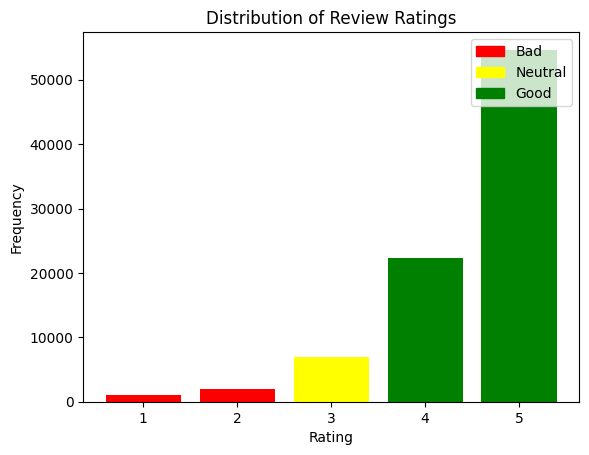

In [ ]:
ratings = df['rating']
# Define the colors for different rating categories
color_map = {1: 'red', 2: 'red', 3: 'yellow', 4: 'green', 5: 'green'}

# Count the frequency of each rating category
rating_counts = ratings.value_counts().sort_index()

# Plot the histogram
plt.bar(rating_counts.index, rating_counts, color=[color_map[rating] for rating in rating_counts.index])

# Set the labels and title
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.title('Distribution of Review Ratings')
# Create custom legend
legend_labels = ['Bad', 'Neutral', 'Good']
legend_colors = ['red', 'yellow', 'green']
legend_patches = [plt.Rectangle((0, 0), 1, 1, color=color) for color in legend_colors]
plt.legend(legend_patches, legend_labels, loc='upper right')

# Show the plot
plt.show()

## Calculate average ratings and number of restaurants

In [ ]:
def toprated():
    # Calculate average ratings and number of reviews
    average_rating = df.groupby('business_id')['rating'].agg(['mean', 'count']).reset_index()
    average_rating.columns = ['business_id', 'Mean', 'Num']
    average_rating = average_rating.sort_values(by=['Mean', 'Num'], ascending=False)
    return average_rating

toprated()

,business_id,Mean,Num
16038,604ee0ddd91e93df8e796c0f,5.0,19
16449,604f3bbf9755094ba8abe1a3,5.0,19
7492,6047277db1a0aaee3eef847d,5.0,15
22283,6052cf3ed8c08f462b93e9c3,5.0,15
7175,6046fe82c5f52be2a51dbd32,5.0,14
...,...,...,...
27573,605707898cd0e3d69a5226a5,1.0,1
27674,60571137d2ad6b7a67e27f62,1.0,1
27717,605716d19ffe343acca5fc80,1.0,1
27777,60571f0b8cd0e3d69a522824,1.0,1


## Frequency Word

In [ ]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

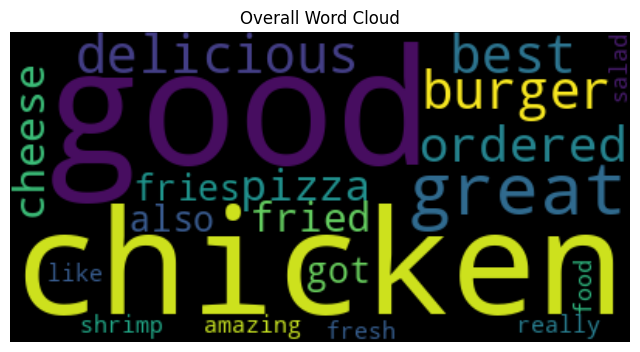

In [ ]:
import matplotlib.pyplot as plt
import nltk
from nltk.tokenize import RegexpTokenizer
from nltk.probability import FreqDist
from nltk.corpus import stopwords
from wordcloud import WordCloud

# set stopwords
sw = set(stopwords.words("english"))

# attain the top N frequent words
def get_top_n_unigrams(df, column, n):
    texts = " ".join(str(review).lower() if isinstance(review, str) else '' for review in df[column])
    tokenizer = RegexpTokenizer(r"\w+")
    tokens = tokenizer.tokenize(texts)
    tokens = [token for token in tokens if token not in sw]
    unigrams = FreqDist(tokens).most_common(n)
    return unigrams

# Use the "review_text" in Dataframe
overall_unigram = get_top_n_unigrams(df, "review_text", n=20)
overallUnigram_df = pd.DataFrame(overall_unigram, columns=['Unigram', 'Count'])

# Creating word cloud
wcoverall = WordCloud(stopwords=sw, background_color='black').generate(" ".join([word for word, count in overall_unigram]))

# Show word cloud
plt.figure(figsize=(8, 6))
plt.imshow(wcoverall, interpolation='bilinear')
plt.title('Overall Word Cloud')
plt.axis('off')  # Not showing axies
plt.show()


It presents a word cloud generated from the 'review_text' column, highlighting the 20 most frequent terms. Top 3 words are "good," "chicken," and "great".